In [1]:
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
def train(X_train, y_train):
    return

In [3]:
def predict(X_train, y_train, x_test, k):
    
    distances = []
    targets = []

    for i in range(len(X_train)):
        
        distances.append([np.sqrt(np.sum(np.square(x_test - X_train[i, :]))), i])

    
    distances = sorted(distances)

    
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    
    return Counter(targets).most_common(1)[0][0]

In [4]:
def k_nearest_neighbor(X_train, y_train, X_test, k):
    
    train(X_train, y_train)


    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [18]:
breast_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data',sep=',')
breast_data.columns = ['class','age', 'menopause', 'tumor-size', 'inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']

In [6]:
breast_data.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [7]:
breast_data = pd.get_dummies(breast_data,drop_first=True)
breast_data

deg-malig  class_recurrence-events  age_30-39  age_40-49  age_50-59  \
0            2                        0          0          1          0   
1            2                        0          0          1          0   
2            2                        0          0          0          0   
3            2                        0          0          1          0   
4            2                        0          0          0          0   
..         ...                      ...        ...        ...        ...   
280          2                        1          1          0          0   
281          3                        1          1          0          0   
282          1                        1          0          0          0   
283          3                        1          0          1          0   
284          3                        1          0          0          1   

     age_60-69  age_70-79  menopause_lt40  menopause_premeno  \
0            0          0               0                  1   
1            0          0               0                  1   
2            1          0               0                  0   
3            0          0               0                  1   
4            1          0               0                  0   
..         ...        ...             ...                ...   
280          0          0               0                  1   
281          0          0               0                  1   
282          1          0               0                  0   
283          0          0               0                  0   
284          0          0               0                  0   

     tumor-size_10-14  ...  inv-nodes_9-11  node-caps_no  node-caps_yes  \
0                   0  ...               0             1              0   
1                   0  ...               0             1              0   
2                   0  ...               0             1              0   
3                   0  ...               0             1              0   
4                   0  ...               0             1              0   
..                ...  ...             ...           ...            ...   
280                 0  ...               0             1              0   
281                 0  ...               0             1              0   
282                 0  ...               0             1              0   
283                 0  ...               0             1              0   
284                 0  ...               0             1              0   

     breast_right  breast-quad_central  breast-quad_left_low  \
0               1                    0                     0   
1               0                    0                     1   
2               1                    0                     0   
3               1                    0                     0   
4               0                    0                     1   
..            ...                  ...                   ...   
280             0                    0                     0   
281             0                    0                     0   
282             1                    0                     0   
283             0                    0                     1   
284             0                    0                     1   

     breast-quad_left_up  breast-quad_right_low  breast-quad_right_up  \
0                      0                      0                     1   
1                      0                      0                     0   
2                      1                      0                     0   
3                      0                      1                     0   
4                      0                      0                     0   
..                   ...                    ...                   ...   
280                    1                      0                     0   
281                    1                      0                     0

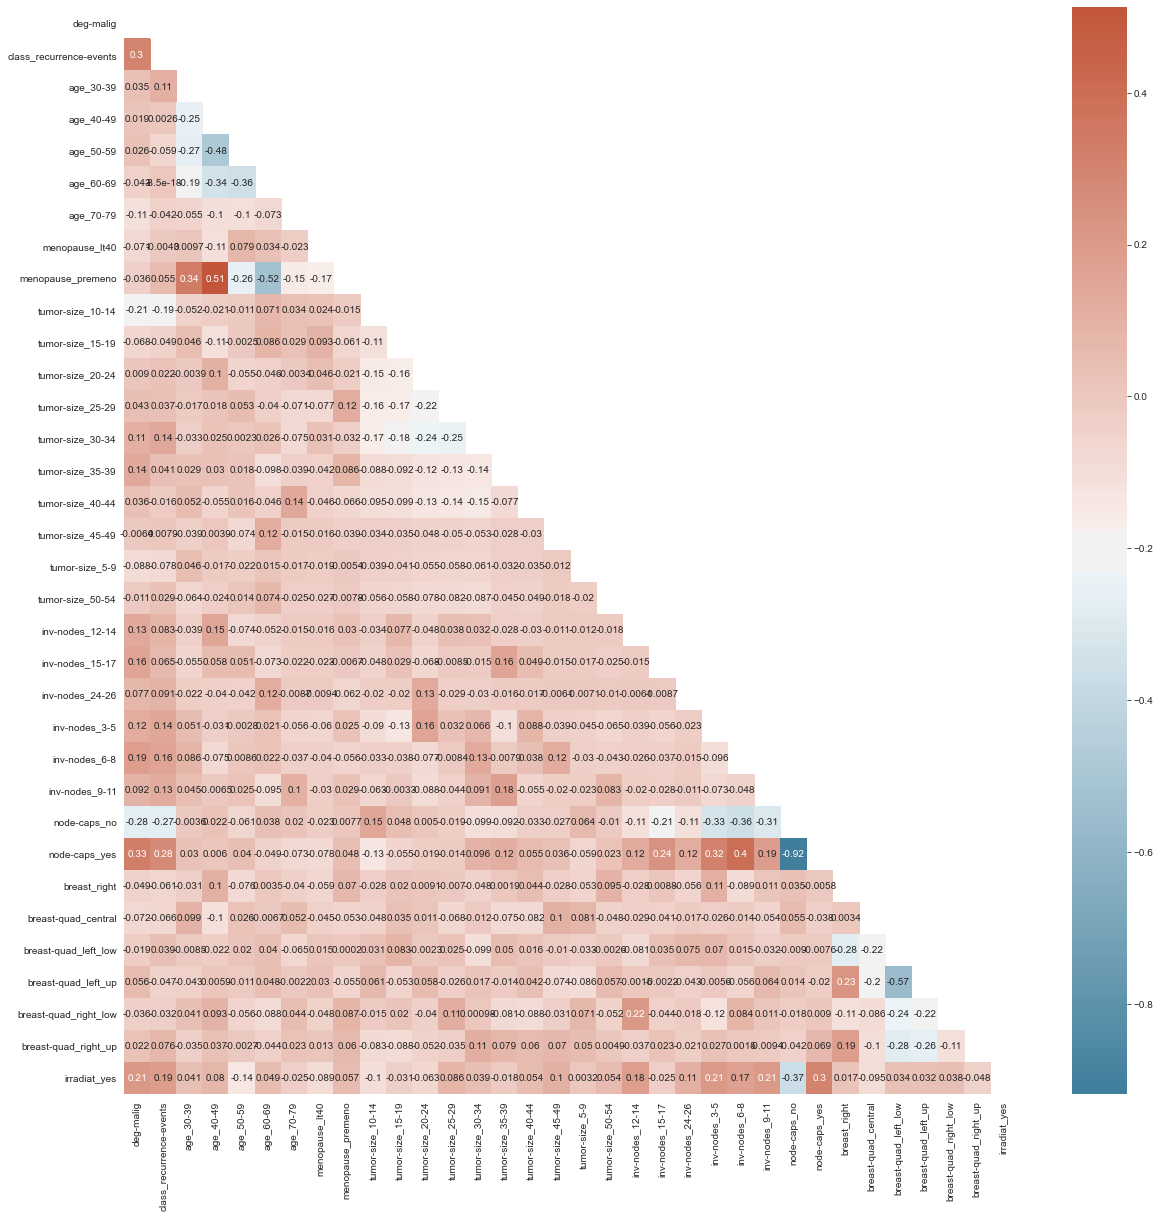

In [8]:
corr = breast_data.corr()
f, ax = plt.subplots(figsize=(20, 20))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [9]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
breast_data.drop(breast_data[to_drop], axis=1, inplace = True)

In [10]:
X = np.array(breast_data.iloc[:,2:])  
y = np.array(breast_data['class_recurrence-events'])    
X_train, \
X_test, \
y_train, \
y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
predictions = k_nearest_neighbor(X_train, y_train, X_test, 5)
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of our classifier is {}".format(100*accuracy))

The accuracy of our classifier is 65.26315789473685
